<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/Prueba_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descricpion del caso


Tipo de fármaco
Requisitos:
Tu tarea es utilizar la información sobre los pacientes para ayudar a los médicos a recomendarles el mejor tipo de medicamento.

Asegúrate de:

Limpiar los datos (ten en cuenta que tendrás que lidiar con muchas variables categóricas)
Explorar los datos (debes incluir al menos dos visualizaciones)
Crear un modelo para predecir el tipo de fármaco
Debes construir el modelo más preciso que puedas. Asegúrate de validar tu modelo utilizando un conjunto de prueba y entrenamiento. Debes poder justificar por qué elegiste el modelo que utilizaste. Esto puede implicar probar varios modelos y determinar el mejor, o ser capaz de explicar y justificar racionalmente tu elección.

# Importacion de librerias

In [64]:
import pandas as pd
import numpy as py
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report



# Montaje Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Coding Dojo/Prueba mes 2/drug200.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Diccionario de datos

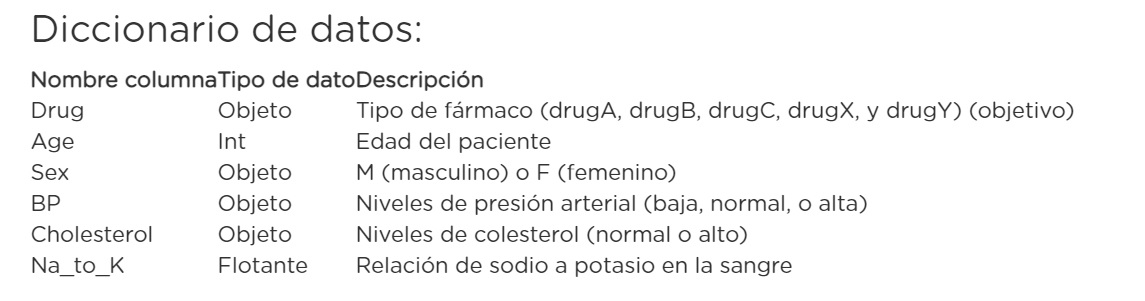


In [4]:
df["Cholesterol"]

0        HIGH
1        HIGH
2        HIGH
3        HIGH
4        HIGH
        ...  
195      HIGH
196      HIGH
197      HIGH
198    NORMAL
199    NORMAL
Name: Cholesterol, Length: 200, dtype: object

# Analisis exploratorio

#Countplots

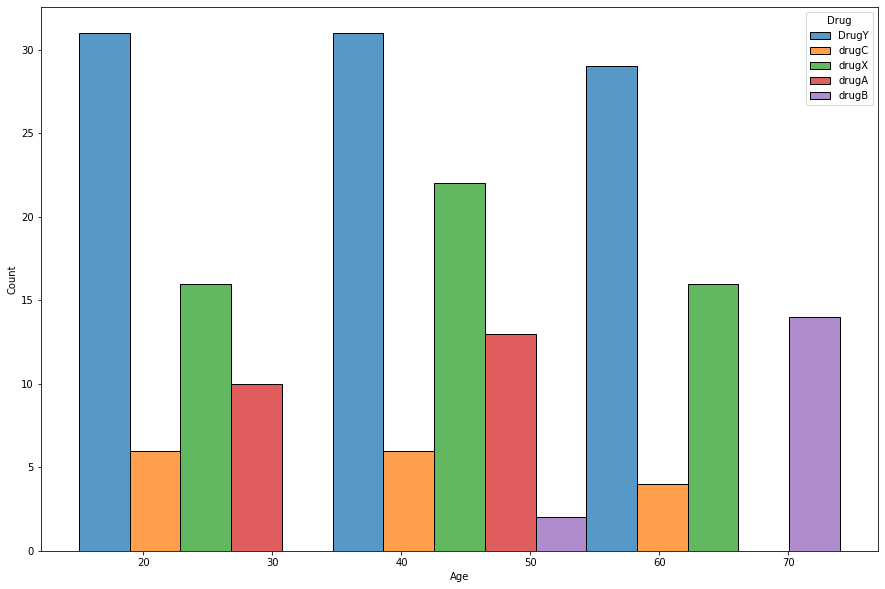

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(x = "Age" ,hue="Drug",multiple="dodge", data = df, bins = 3)

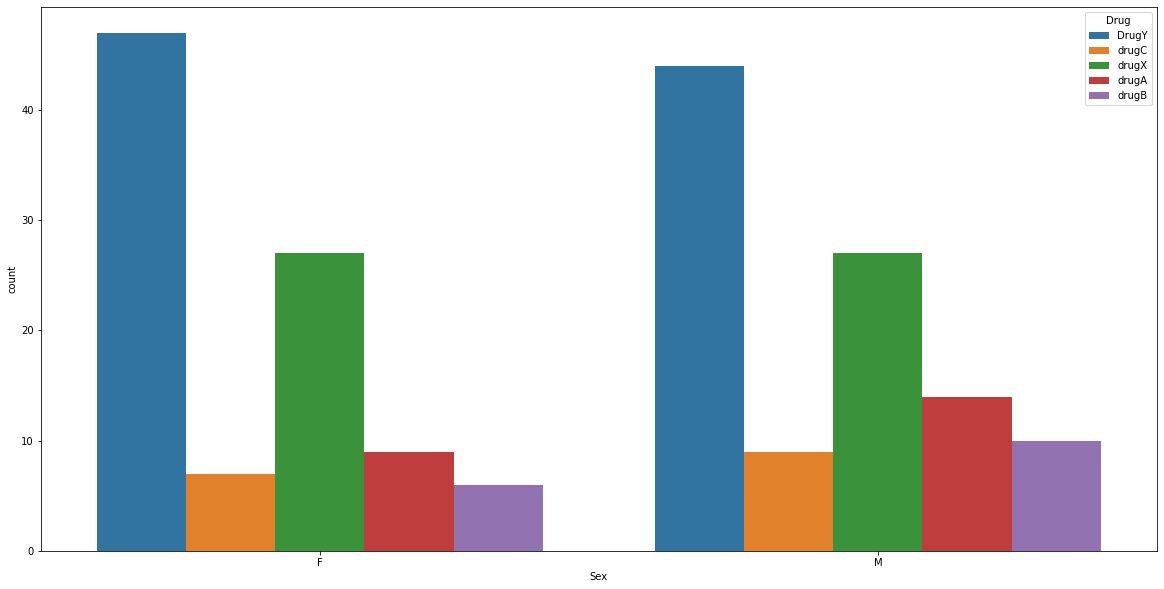

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Sex" ,hue="Drug", data = df)



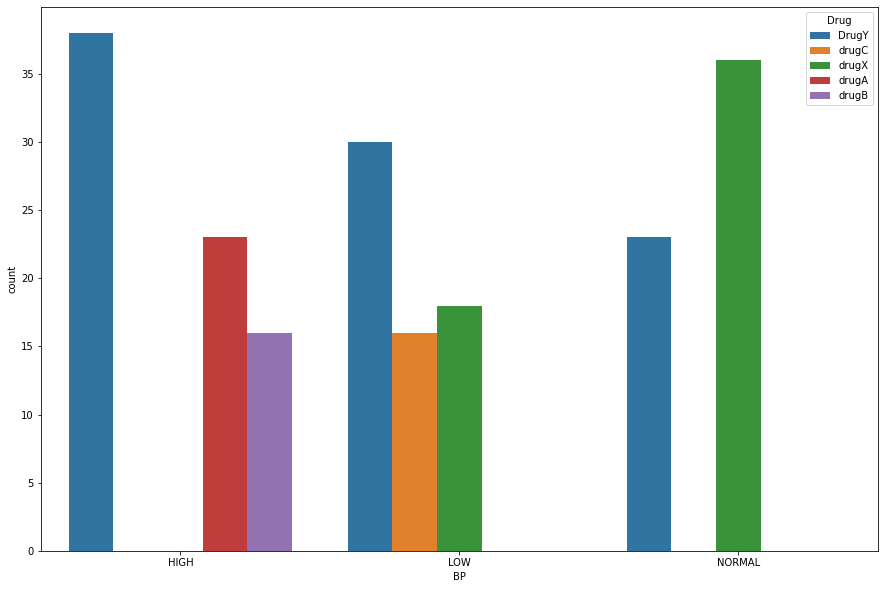

In [61]:
plt.figure(figsize=(15,10))
sns.countplot(x = "BP" ,hue="Drug", data = df)

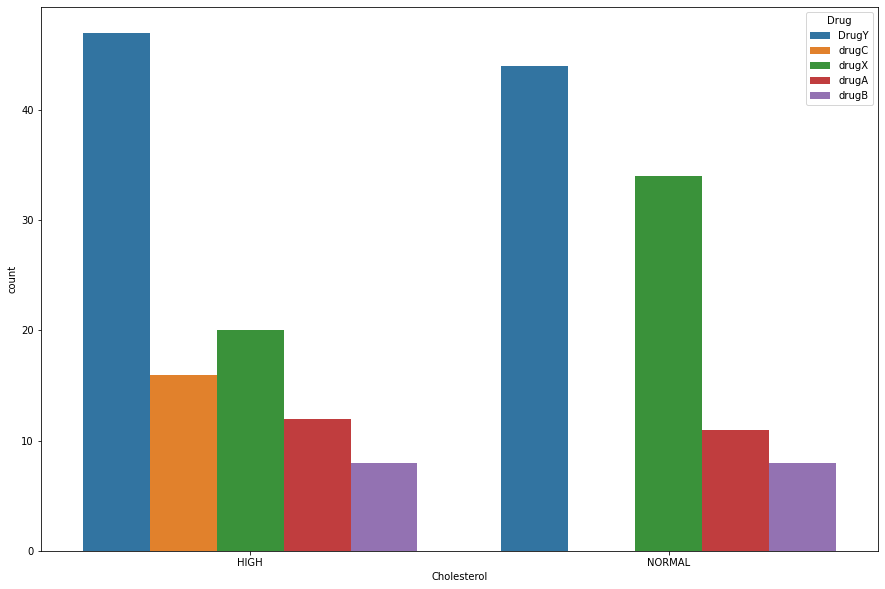

In [62]:
plt.figure(figsize=(15,10))
sns.countplot(x = "Cholesterol" ,hue="Drug", data = df)

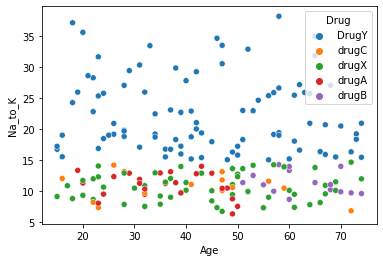

In [9]:
sns.scatterplot(x = "Age", y = "Na_to_K", hue = "Drug", data = df)

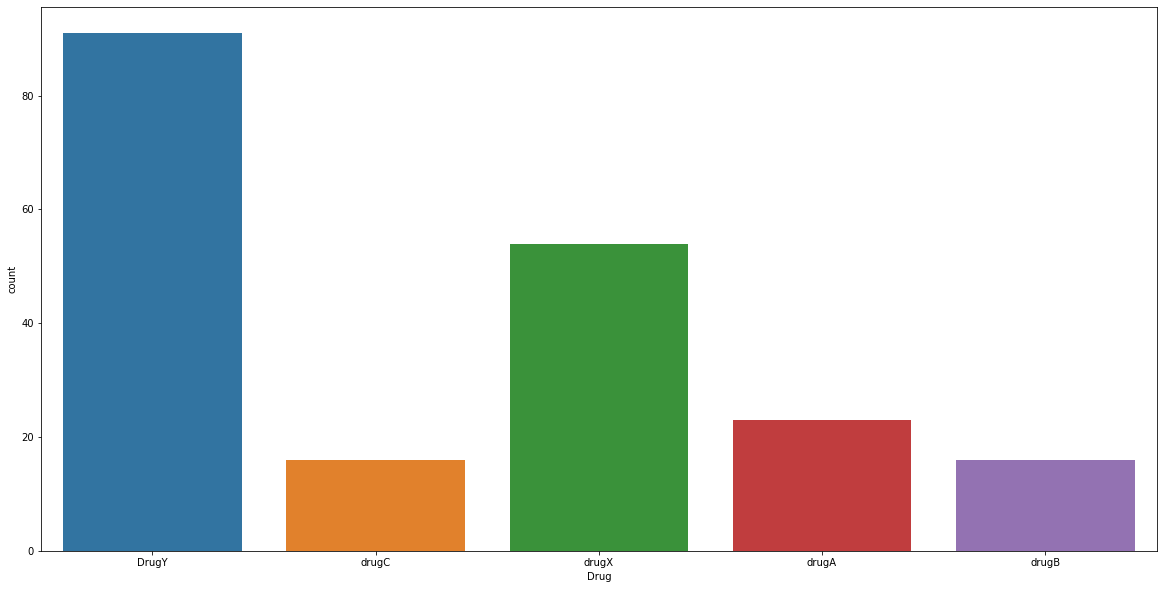

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x = "Drug" ,data = df)

# Generacion de features y target + preprocesamiento 

In [11]:
X = df.drop(columns={"Drug"},axis=1)
y = df["Drug"]


column_trans  = make_column_transformer(
(StandardScaler(),["Age","Na_to_K"]),
(OneHotEncoder(), (["Sex","BP","Cholesterol"])))  # codigo Generado en ayudantia con jesus



# Division de entrnamiento

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 1, train_size = 0.7, stratify = y)

# Instancia KNN Clasificador y pipeline y primera evaluacion sin evaluacion cruzada ni gridsearch

In [23]:
from sklearn.pipeline import Pipeline

knn = KNeighborsClassifier(n_neighbors=16)

pipe_Knn = Pipeline(steps=[('column_trans', column_trans), ('knn', knn)])

validacion_cruzada_knn = cross_val_score(pipe_Knn, X_train, y_train, cv=10, scoring="f1_micro")

print("f1 micro promedio", validacion_cruzada_knn.mean())

f1 micro promedio 0.9000000000000001


# Validacion cruzada y gridsearch

In [14]:
 
 params = {
        'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 16,  17, 19, 21, 23, 25] # usually odd numbers
         
    } #codigo sacado de stackoverflow


grid_knn = GridSearchCV(estimator = pipe_Knn, param_grid = params, scoring = 'f1_micro', cv=10) 

grid_knn.fit(X_train,y_train)           


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('column_trans',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('standardscaler',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['Age',
                                                                        

In [15]:
print("Mejor score (F1 Micro): ", grid_knn.best_score_)   #Codigo sacado de Abolt github
print("Mejores hiperparámetros: ", grid_knn.best_params_)
print("Mejor modelo: ", grid_knn.best_estimator_)

Mejor_modelo_KNN = grid_knn.best_estimator_

Mejor score (F1 Micro):  0.9000000000000001
Mejores hiperparámetros:  {'knn__n_neighbors': 16}
Mejor modelo:  Pipeline(memory=None,
         steps=[('column_trans',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['Age', 'Na_to_K']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                 

# Evaluacion Test

In [16]:
Mejor_modelo_KNN.fit(X_train, y_train)
y_predict_KNN = Mejor_modelo_KNN.predict(X_test)
F1_SCORE_KNN = f1_score(y_test,y_predict_KNN, average='micro')
print(F1_SCORE_KNN)

0.9333333333333333


# Bosque Aleatorio

In [39]:

RandomForestClassifier()

RF = RandomForestClassifier(n_estimators = 1500, min_samples_split = 2 , max_depth = 5, min_samples_leaf = 2) 

pipe_RF = Pipeline(steps=[('column_trans', column_trans), ('RF', RF)])

validacion_cruzada_RF = cross_val_score(pipe_RF, X_train, y_train, cv=10, scoring="f1_micro")

print("f1 micro promedio", validacion_cruzada_RF.mean())

f1 micro promedio 0.9928571428571429


In [40]:
# no me dejo utilizar el gridsearch

pipe_RF.fit(X_train, y_train)

y_predict_RF = pipe_RF.predict(X_test)
F1_SCORE_RF = f1_score(y_test,y_predict_RF, average='micro')
print(F1_SCORE_RF)

0.9833333333333333


# Seleccion de modelo 

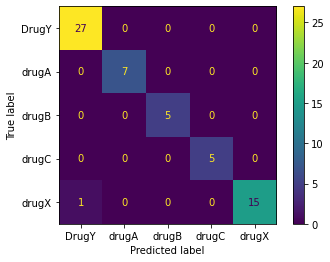

In [41]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_RF, X_test, y_test) 







In [67]:
print(classification_report(y_test,y_predict_RF))

              precision    recall  f1-score   support

       DrugY       0.96      1.00      0.98        27
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.94      0.97        16

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



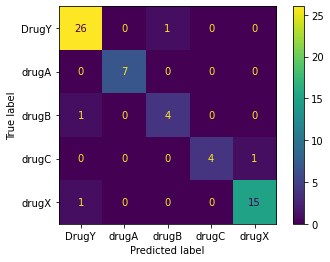

In [42]:
plot_confusion_matrix(Mejor_modelo_KNN, X_test, y_test) 

In [69]:
print(classification_report(y_test,y_predict_KNN))

              precision    recall  f1-score   support

       DrugY       0.93      0.96      0.95        27
       drugA       1.00      1.00      1.00         7
       drugB       0.80      0.80      0.80         5
       drugC       1.00      0.80      0.89         5
       drugX       0.94      0.94      0.94        16

    accuracy                           0.93        60
   macro avg       0.93      0.90      0.91        60
weighted avg       0.93      0.93      0.93        60

